### Notebook to implement fix for RR_Diff problem

Problem case where differences between adjacent RR-intervals were also calculated whenever, because of a rejected peak, the two RR-intervals would not technically be adjacent in the original signal.

In [1]:
import sys
sys.path.append('../')
import heartbeat as hb
import matplotlib.pyplot as plt
import numpy as np

data = hb.get_data('pp8_Som_Ven_C0_data.txt')[:,1]

In [26]:
data

array([346., 345., 349., ..., 338., 337., 341.])

In [27]:
#Updated function used in heartbeat
def update_rr():
    '''Updates RR differences and RR squared differences based on corrected RR list

    Uses information about rejected peaks to update RR_list_cor, and RR_diff, RR_sqdiff
    in the working_data{} dict.
    '''
    rr_source = working_data['RR_list']
    b_peaks = working_data['binary_peaklist']
    rr_list = [rr_source[i] for i in range(len(rr_source)) if b_peaks[i] + b_peaks[i+1] == 2]
    rr_mask = [0 if (b_peaks[i] + b_peaks[i+1] == 2) else 1 for i in range(len(rr_source))] #compute mask
    rr_diff = np.abs(np.diff(rr_list))
    rr_sqdiff = np.power(rr_diff, 2)
    
   
    working_data['RR_masklist'] = rr_mask #store mask
    working_data['RR_list_cor'] = rr_list
    working_data['RR_diff'] = rr_diff
    working_data['RR_sqdiff'] = rr_sqdiff

In [3]:
m = hb.process(data, 100.0)

print(hb.working_data.keys())

dict_keys(['hr', 'peaklist', 'ybeat', 'rolmean', 'RR_list', 'RR_diff', 'RR_sqdiff', 'rrsd', 'best', 'peaklist_cor', 'removed_beats', 'removed_beats_y', 'binary_peaklist', 'RR_masklist', 'RR_list_cor'])


[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0]


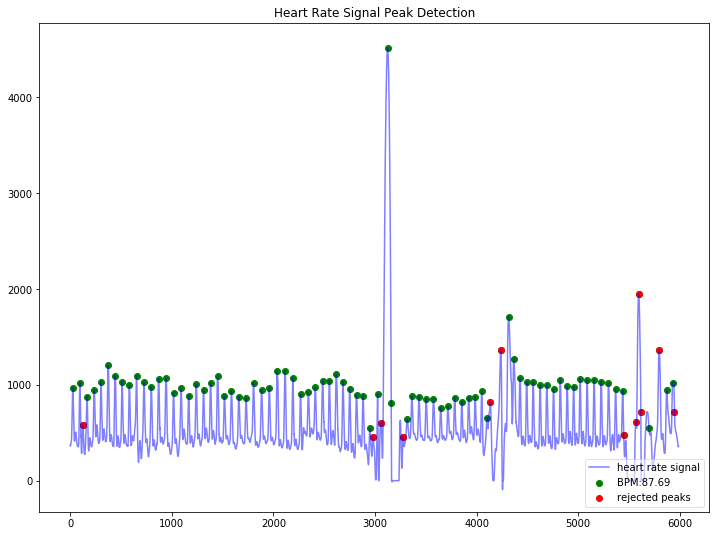

In [4]:
print(hb.working_data['binary_peaklist'])

plt.figure(figsize=(12,9))
hb.plotter()


In [5]:
peaks = hb.working_data['peaklist']
rrlist = hb.working_data['RR_list']

peaks_cor = hb.working_data['peaklist_cor']
rrlist_cor = hb.working_data['RR_list_cor']
rr_bin = hb.working_data['RR_masklist']

binpeaks = hb.working_data['binary_peaklist']

print(len(rrlist))
print(len(peaks))

print(len(peaks_cor))
print(len([x for x in binpeaks if x == 1]))
print(len(rr_bin))
print(len(rrlist_cor))

#rrmask = [x for x in ]

90
91
79
79
90
71


In [6]:
print(binpeaks)
print(rr_bin)

[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0]
[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1]


In [8]:
rrmask = np.ma.array(rrlist, mask=rr_bin)

print(rrmask[0:10])

[700.0 -- -- 710.0 670.0 700.0 680.0 690.0 720.0 710.0]


In [25]:
d = np.abs(np.diff(rrmask))

print(d)
print(d[~d.mask])

[-- -- -- 40.0 30.0 20.0 10.0 30.0 10.0 20.0 20.0 10.0 10.0 20.0 10.0 10.0
 10.0 20.0 20.0 20.0 0.0 10.0 30.0 0.0 10.0 60.0 30.0 20.0 10.0 0.0 10.0
 10.0 90.0 40.0 60.0 30.0 40.0 10.0 20.0 40.0 10.0 -- -- -- -- -- -- -- --
 240.0 0.0 20.0 10.0 0.0 40.0 30.0 20.0 50.0 20.0 130.0 -- -- -- -- 90.0
 70.0 40.0 60.0 30.0 0.0 0.0 20.0 50.0 20.0 40.0 10.0 20.0 20.0 20.0 0.0
 -- -- -- -- -- -- -- -- --]
[40.0 30.0 20.0 10.0 30.0 10.0 20.0 20.0 10.0 10.0 20.0 10.0 10.0 10.0
 20.0 20.0 20.0 0.0 10.0 30.0 0.0 10.0 60.0 30.0 20.0 10.0 0.0 10.0 10.0
 90.0 40.0 60.0 30.0 40.0 10.0 20.0 40.0 10.0 240.0 0.0 20.0 10.0 0.0 40.0
 30.0 20.0 50.0 20.0 130.0 90.0 70.0 40.0 60.0 30.0 0.0 0.0 20.0 50.0 20.0
 40.0 10.0 20.0 20.0 20.0 0.0]


### comparing new results to above output

In [2]:
m = hb.process(data, 100.0)

In [4]:
print(hb.working_data['RR_diff'])

[40.0 30.0 20.0 10.0 30.0 10.0 20.0 20.0 10.0 10.0 20.0 10.0 10.0 10.0
 20.0 20.0 20.0 0.0 10.0 30.0 0.0 10.0 60.0 30.0 20.0 10.0 0.0 10.0 10.0
 90.0 40.0 60.0 30.0 40.0 10.0 20.0 40.0 10.0 240.0 0.0 20.0 10.0 0.0 40.0
 30.0 20.0 50.0 20.0 130.0 90.0 70.0 40.0 60.0 30.0 0.0 0.0 20.0 50.0 20.0
 40.0 10.0 20.0 20.0 20.0 0.0]
